## Iniciando o data frame

In [295]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [296]:
df = pd.read_csv('adult.csv')

In [297]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


## Observações iniciais

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47985 non-null  int64 
 1   workclass        47985 non-null  object
 2   fnlwgt           47985 non-null  int64 
 3   education        47985 non-null  object
 4   educational-num  47985 non-null  int64 
 5   marital-status   47985 non-null  object
 6   occupation       47985 non-null  object
 7   relationship     47985 non-null  object
 8   race             47985 non-null  object
 9   gender           47985 non-null  object
 10  capital-gain     47985 non-null  int64 
 11  capital-loss     47985 non-null  int64 
 12  hours-per-week   47985 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           47985 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [299]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,4.798500e+04,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,1.895940e+05,10.067229,1067.032093,87.370553,40.411483
std,13.729622,1.057605e+05,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Análise de dados contínuos

## Analisando a coluna "age"

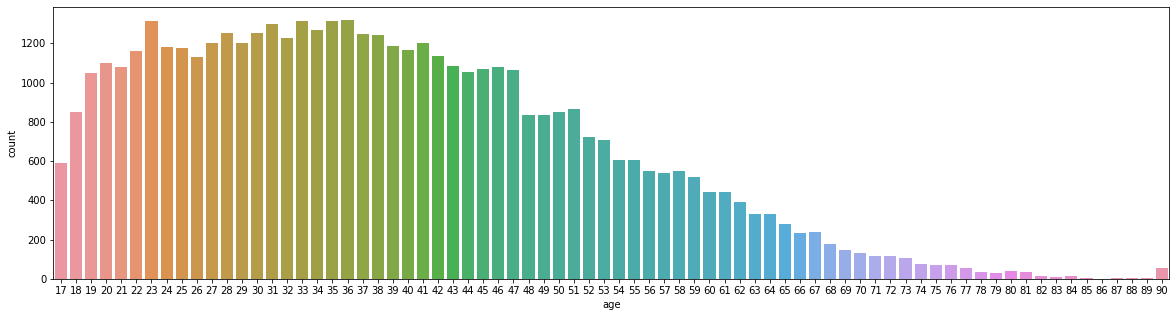

In [300]:
plt.figure(figsize=(20,5))
sns.countplot(x ='age', data=df)
plt.show()

A primeira coisa que podemos observar é que a faixa de idade mais frequente está contida no intervalo [19, 46]

In [301]:
df['age'].mean(), df['age'].std()

(38.64128373450036, 13.72962160885658)

Assim como foi mostrado nas observações, a média das idades é de aproximadamente 38 - com um desvio padrão relativamente alto de 13

## Analisando a coluna 'educational-num'

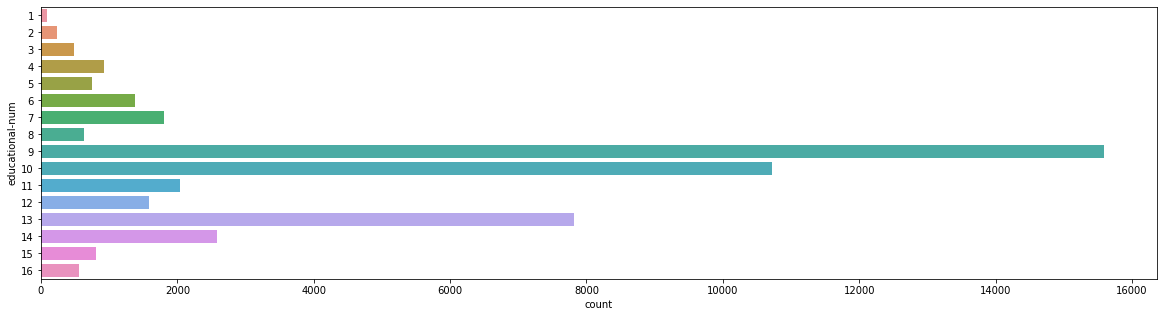

In [347]:
plt.figure(figsize=(20,5))
sns.countplot(y ='educational-num', data=df)
plt.show()

Vemos que a faixa mais frequente é [9], correspondente à variável HS-Grad, ou seja, grande parte das pessoas presentes na base de dados concluíram/frequentaram a High School.

<AxesSubplot:xlabel='educational-num', ylabel='age'>

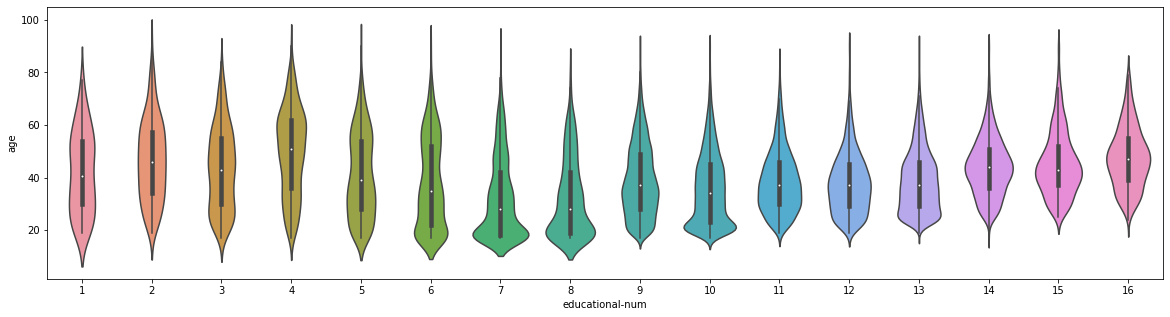

In [303]:
plt.figure(figsize=(20,5))
sns.violinplot(x='educational-num', y='age',data=df, split=True)

Utilizando deste gráfico de violino podemos observar a relação entre a idade e a quantidade de anos dedicadas à educação, podemos ver a tendência de deslocamento para quanto mais velho o indivíduo, mais anos foram dedicados.
Ainda seguindo no raciocínio citado anteriormente, podemos ver que na faixa de 20 anos há uma grande concentração de indivíduos que fizeram cerca de 7 à 10 anos de estudos

## Analisando a coluna 'hours-per-week'

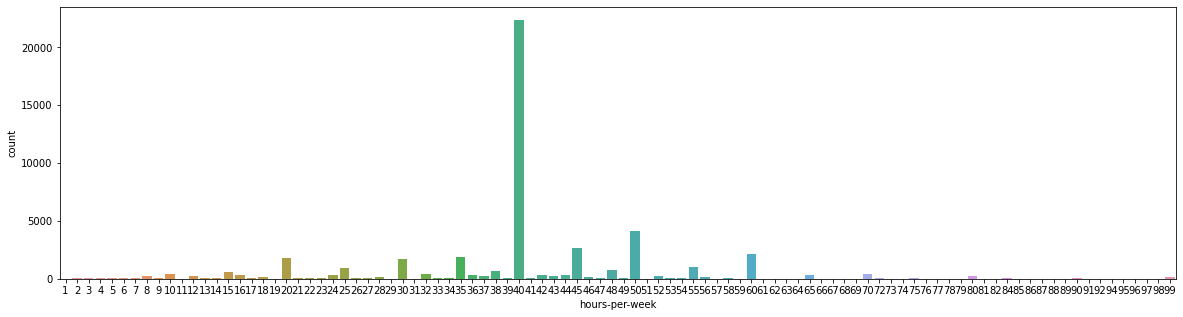

In [346]:
plt.figure(figsize=(20,5))
sns.countplot(x ='hours-per-week', data=df)
plt.show()

Podemos observar inicialmente uma grande concentração de pessoas que trabalham 40 horas por semana - que é equivalente à jornada de trabalho comum brasileira de 8 horas/dia de Segunda à Sexta.

In [305]:
df['hours-per-week'].std()

12.39107280461587

Podemos observar que há um desvio padrão pequeno levando em consideração a amplitude do intervalo [1, 99], além disso observando os dados apresentados no gráfico, podemos ver que existem outliers nas extremidades (99 e 1 horas trabalhadas por semana) e em suas proximidades.

## Análise da coluna 'capital-gain' 

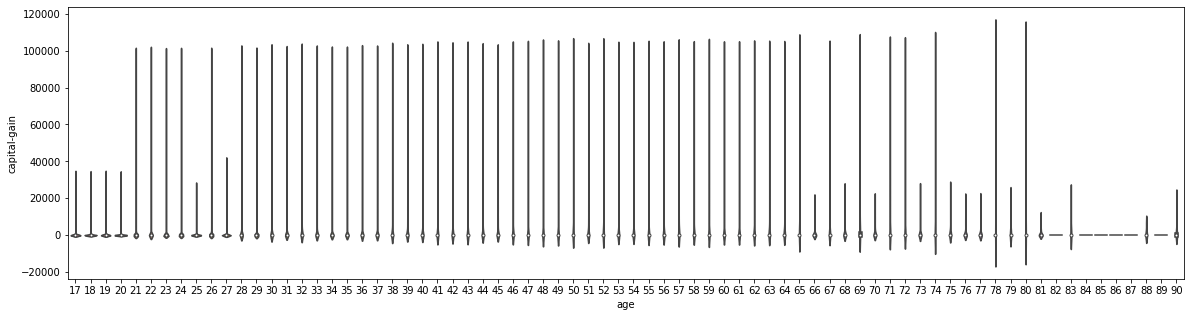

In [306]:
plt.figure(figsize=(20,5))
sns.violinplot(x='age', y='capital-gain',data=df, split=True)
plt.show()

In [307]:
df['capital-gain'].std()

7373.256662650826

Podemos observar inicialmente que há um imenso desvio padrão nos dados de capital-gain, além de algumas inconsistências demonstradas no gráfico onde há a negativação do ganho.

<AxesSubplot:xlabel='age', ylabel='capital-loss'>

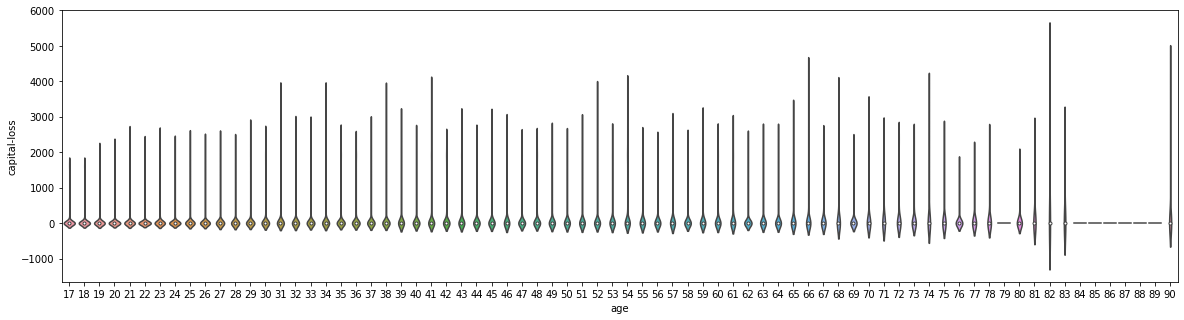

In [308]:
plt.figure(figsize=(20,5))
sns.violinplot(x='age', y='capital-loss',data=df, split=True)


Em capital-loss podemos também observar alguma inconsistências, encontradas também na mesma faixa das de capital-loss.

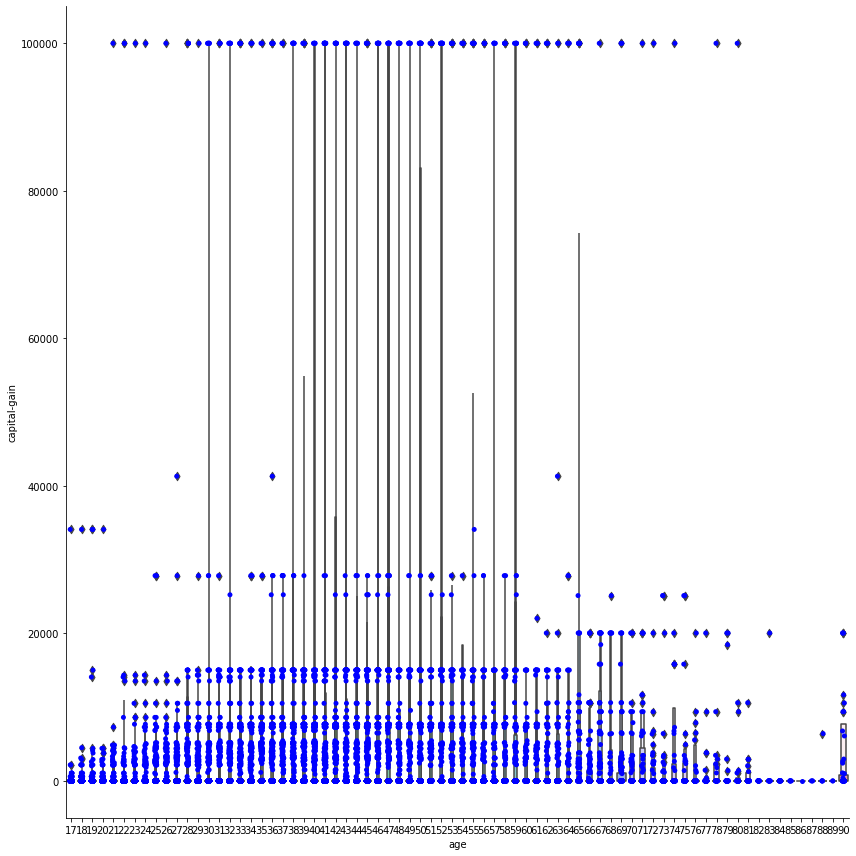

In [309]:
sns.catplot(x="age", y="capital-gain", kind="boxen", height=12,data=df);
sns.stripplot(x="age", y="capital-gain", data=df, color="blue");

Mais uma vez evidencio a presença de muitos outlier no conjunto de dados.

In [310]:
df_corr = df.loc[:, ['age', 'capital-gain']]

<AxesSubplot:>

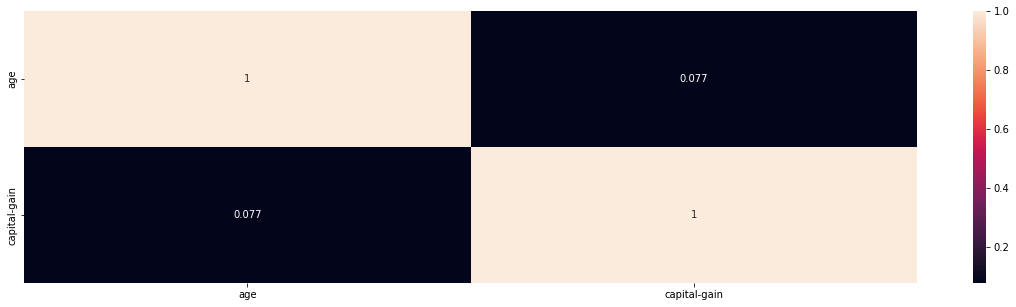

In [311]:
plt.figure(figsize=(20,5))
sns.heatmap(df_corr.corr(), annot=True)

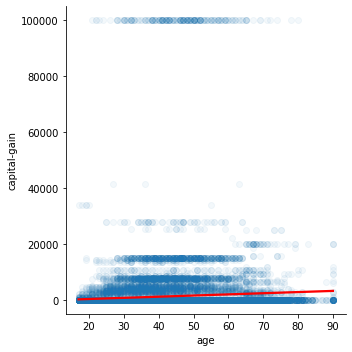

In [312]:
sns.lmplot(x ='age', y ='capital-gain', data = df,scatter_kws={'alpha':0.05},line_kws={'color':'red'} )

Os gráficos de correlação entre capital-gain e age evidenciam que há baixa correlação entre as variáveis, ainda sim, podemos ver que há uma grande concentração de pontos nas faixas próximas de 1000 e com uma pequena tendência ao aumento de capital-gain junto ao aumento da idade.

<AxesSubplot:xlabel='educational-num', ylabel='capital-gain'>

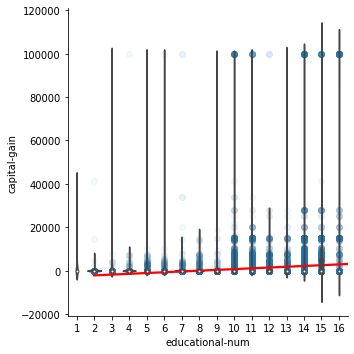

In [313]:
sns.lmplot(x ='educational-num', y ='capital-gain', data = df,scatter_kws={'alpha':0.05},line_kws={'color':'red'} )
sns.violinplot(x='educational-num', y='capital-gain',data=df, split=True)

Podemos aqui também observar uma pequena tendência ao aumento em capital-gain de acordo com o aumento em educational-num.

## Analisando a coluna 'Income'

<AxesSubplot:xlabel='income', ylabel='count'>

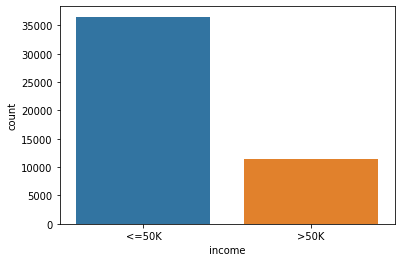

In [314]:
sns.countplot(x="income", data=df)

In [315]:
df_inc_grp = df.loc[:, ['income']].groupby('income') 
df_inc_grp.value_counts()

income
<=50K    36518
>50K     11467
dtype: int64

Como podemos observar, a relação entre rendas é extremamente favorável para <=50K, mostrando que aproximadamente 76% das pessoas ganham nesta faixa

Para trabalhar melhor com os dados, alterarei os valores para 0 e 1, sendo que 0 indica quando income é "<=50K" e 1 indica o contrário.

In [316]:
df.loc[df['income'] == "<=50K", 'income'] = 0
df.loc[df['income'] == ">50K", 'income'] = 1

<AxesSubplot:xlabel='income', ylabel='age'>

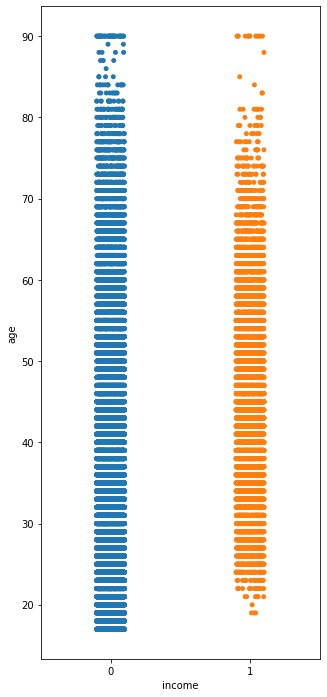

In [317]:
plt.figure(figsize=(5, 12))
sns.stripplot(x='income', y='age', data=df)

Podemos observar acima que não há uma tendência de crescimento de renda ao longo das idades.

<AxesSubplot:xlabel='gender', ylabel='income'>

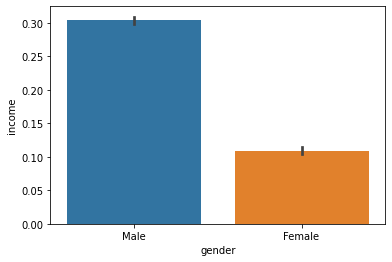

In [318]:
sns.barplot(x='gender', y='income', data=df, estimator=np.mean)

<AxesSubplot:xlabel='race', ylabel='income'>

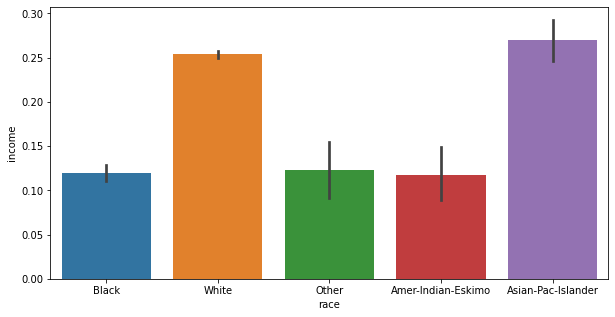

In [397]:
plt.figure(figsize=(10, 5))
sns.barplot(x='race', y='income', data=df, estimator=np.mean)

Porém, podemos notar que existem tendências de income quanto à raça e gênero.

# Análise de dados categóricos

## Analisando a coluna 'marital status'

<AxesSubplot:xlabel='Count', ylabel='marital-status'>

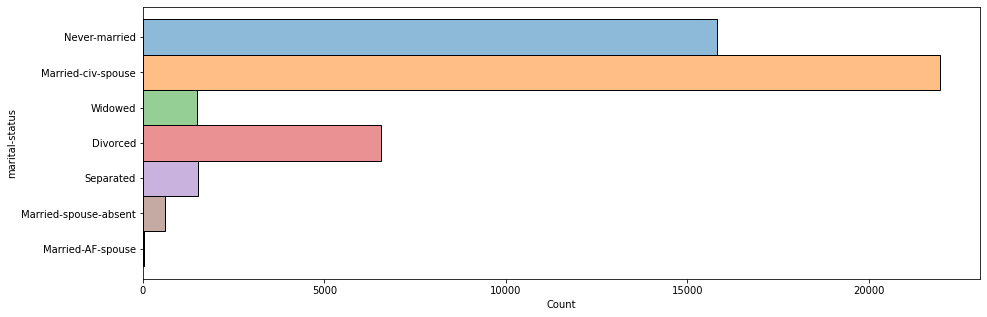

In [339]:
plt.figure(figsize=(15,5))
sns.histplot(y='marital-status', data=df, hue='marital-status', legend=False)

<AxesSubplot:xlabel='Count', ylabel='marital-status'>

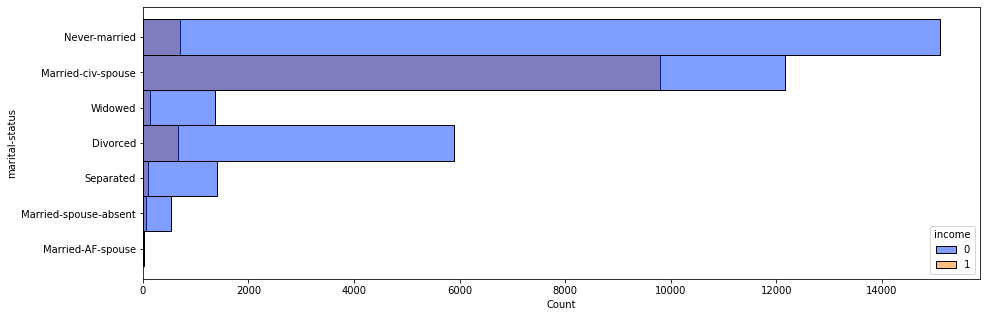

In [415]:
plt.figure(figsize=(15,5))
sns.histplot(y='marital-status', data=df, hue='income', palette='bright',legend=True)

Podemos perceber que as categorias que dominam são as pessoas casadas em papel e as que nunca foram casadas, além disso vemos que não há detalhamento suficiente para compararmos a renda com o estado civil.

## Analisando as colunas 'education' e 'occupation'

<AxesSubplot:xlabel='Count', ylabel='education'>

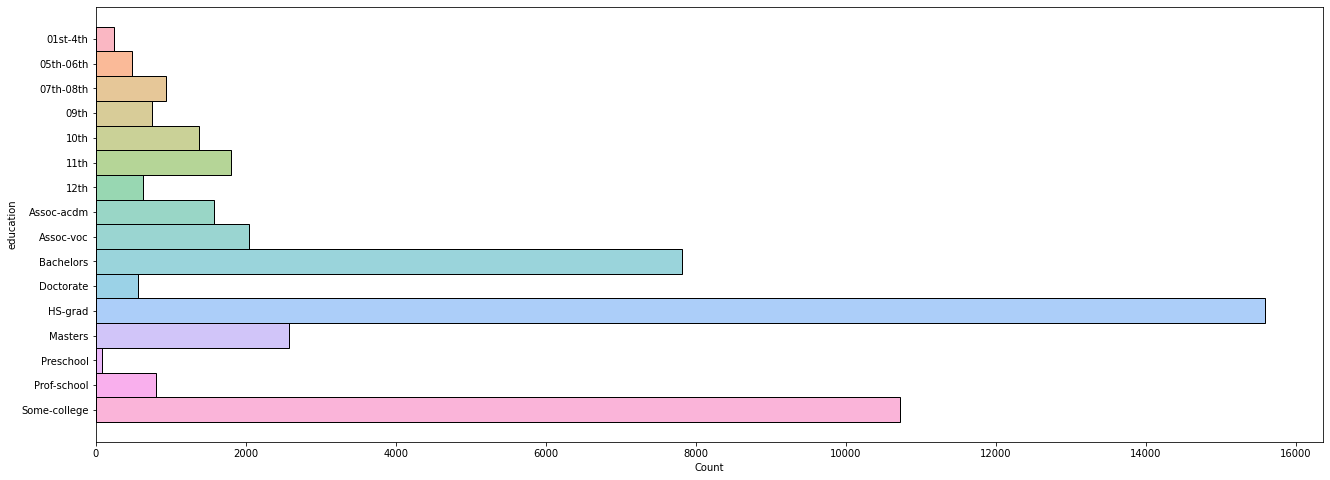

In [380]:
#As alterações aqui são unicamente para manter uma certa ordenação 
plt.figure(figsize=(22,8))
df.loc[df['education'] == "1st-4th", 'education'] = "01st-04th"
df.loc[df['education'] == "5th-6th", 'education'] = "05th-06th"
df.loc[df['education'] == "7th-8th", 'education'] = "07th-08th"
df.loc[df['education'] == "9th", 'education'] = "09th"
df_sorted = df.loc[:, ['education']].sort_values(by='education')
sns.histplot(y='education', data=df_sorted, hue='education', legend=False)

Este resultado corrobora com a conclusão anterior de que maior parte das pessoas frenquentou a HS.

### Occupation x Gender

<AxesSubplot:xlabel='Count', ylabel='occupation'>

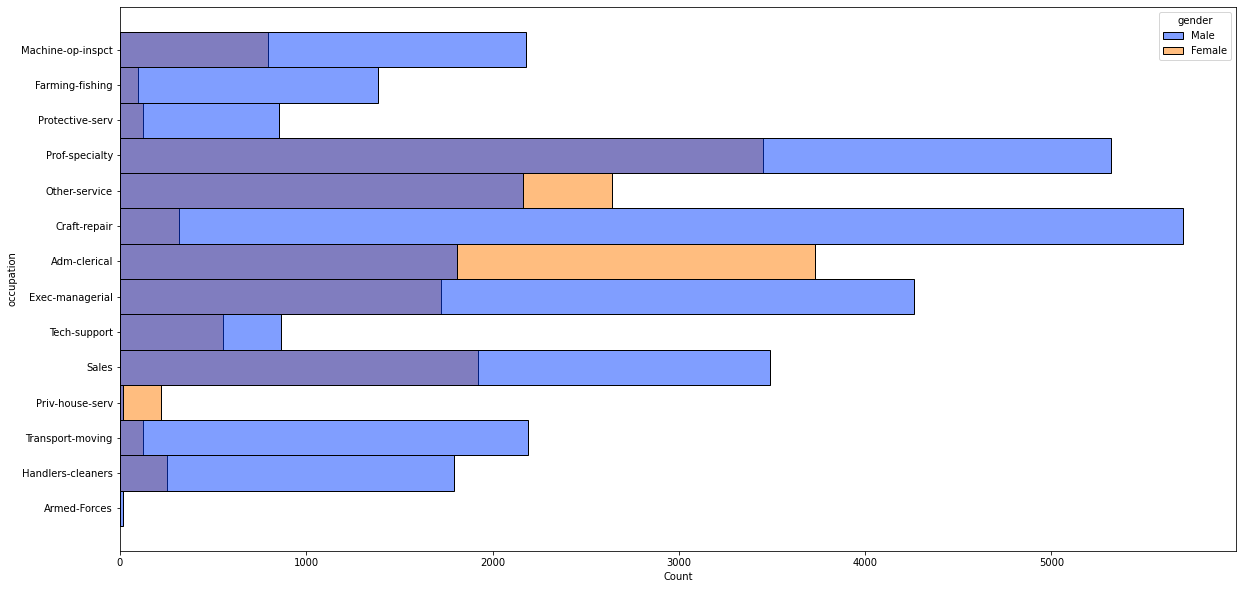

In [378]:
plt.figure(figsize=(20,10))
sns.histplot(y='occupation', data=df, hue='gender', legend=True, palette='bright')

Vemos que há mais homens que mulheres ocupando os cargos, isso pode também dever-se à disparidade entre homens e mulheres presentes na data base.

In [403]:
gender_count = df.loc[:, ['gender']].groupby('gender')
gender_count.value_counts()

gender
Female    15944
Male      32041
dtype: int64

Podemos ver que temos aproximadamente o dobro de homens, apesar da disparidade podemos ver que realmente a ocupação entre cargos possui viés de gênero.

### Occupation x Education

<AxesSubplot:xlabel='Count', ylabel='occupation'>

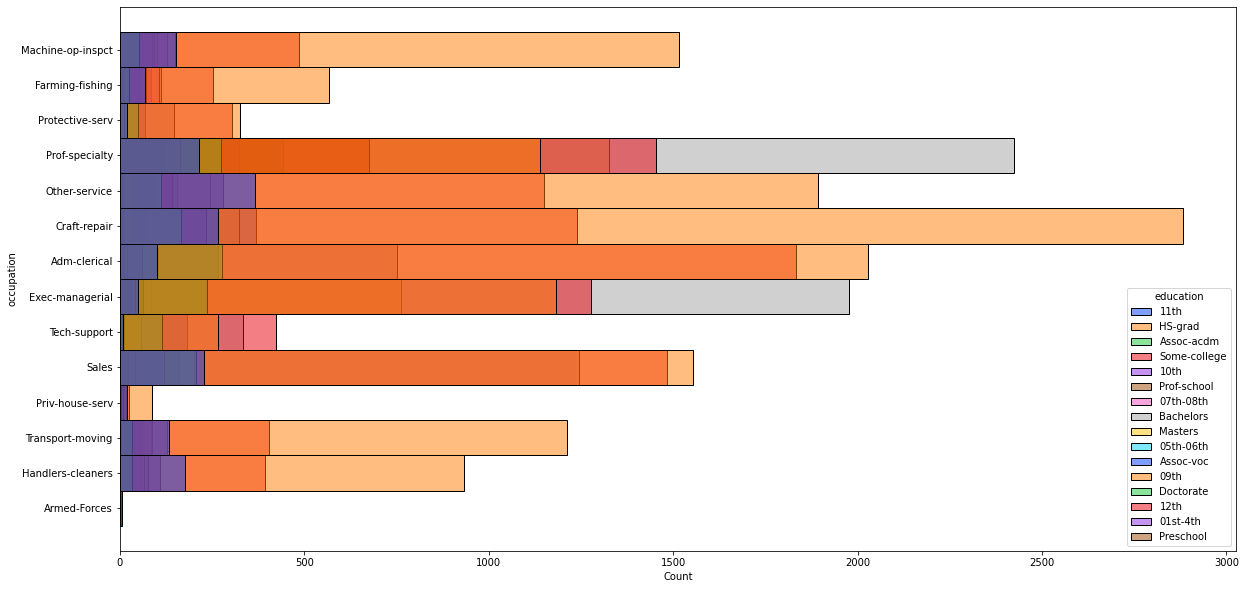

In [387]:
plt.figure(figsize=(20,10))
sns.histplot(y='occupation', data=df, hue='education', legend=True, palette='bright')

Pode-se notar grande parte dos cargos está ocupada por aqueles com nível educacional HS-grad e 09th.

### Occupation x Income

<AxesSubplot:xlabel='Count', ylabel='education'>

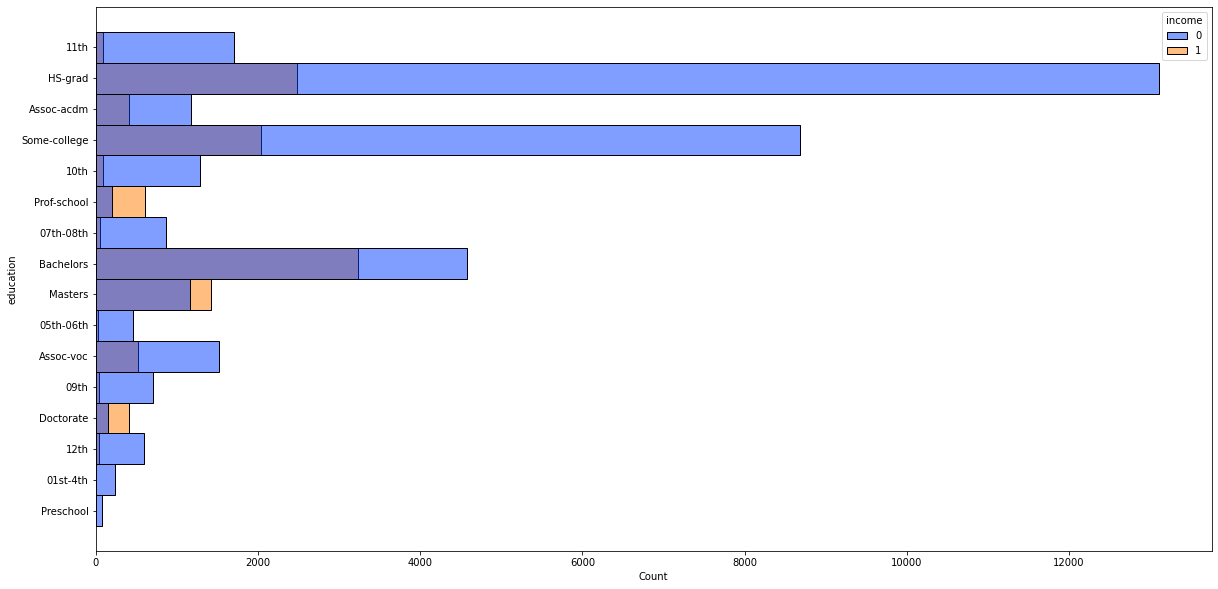

In [393]:
plt.figure(figsize=(20,10))
sns.histplot(y='education', data=df, hue='income', palette='bright',legend=True)

Apesar de grande parte dos cargos serem ocupados por pessoas com nível HS-grad e 09th, temos que aqueles que possuem renda salarial acima de 50K estão concentrados em Prof-school, Masters e Doctorate.

### Education x Race

<AxesSubplot:xlabel='Count', ylabel='education'>

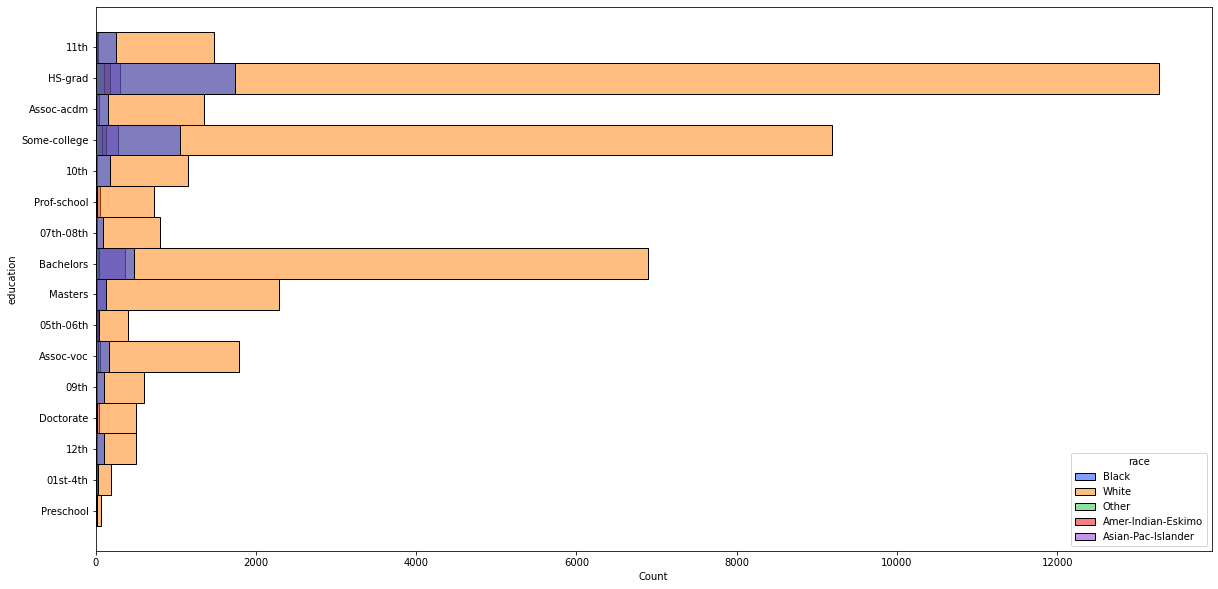

In [417]:
plt.figure(figsize=(20,10))
sns.histplot(y='education', data=df, hue='race', palette='bright',legend=True)

In [420]:
teste = df.loc[:, ['race']].groupby('race')
teste.value_counts()

race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1391
Black                  4553
Other                   382
White                 41189
dtype: int64

Percebemos que o gráfico aponta uma grande disparidade quanto ao nível educacional, favorecendo aqueles de raça Branca, entretanto, devemos notar que a quantidade de pessoas que se identificam como Brancos presentes no banco de dados é extremamente superior às outras, portanto estes dados provavelmente estão enviesados pelo tamanho da amostra.